In [1]:
import matplotlib.pyplot as plt
import sys
import os
from pathlib import Path
import sys
import os
from pathlib import Path
import matplotlib.style as style

import numpy as np
import matplotlib.pyplot as plt
import yaml
from neurodsp.spectral import compute_spectrum_welch


# Set up file paths
file_path = str(Path().absolute())
project_path = str(Path().absolute().parent.parent)

os.chdir(project_path)
sys.path.append(project_path)

In [3]:
# Set an experiment name and input directory
exp = 'w12_18.spont'
input_dir = f"{project_path}/data/processed/{exp}"

# Set an output directory for figures
output_dir = f"{project_path}/res/spectral-analysis/{exp}/general-spectral-analysis"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

files = os.listdir(input_dir)
for file in files:
    if file.endswith('.npy'):
        if file == 'Probe1_lfps_spont.npy':
            ecog_data_18 = np.load(input_dir + '/' + file, allow_pickle=True)
        if file == 'Probe2_lfps_spont.npy':
            probe1_data_18 = np.load(input_dir + '/' + file, allow_pickle=True)
        if file == 'Probe3_lfps_spont.npy':
            probe2_data_18 = np.load(input_dir + '/' + file, allow_pickle=True)
        if file == 'times.npy':
            times_18 = np.load(input_dir + '/' + file, allow_pickle=True)

# Set an experiment name and input directory
exp = 'w12_07.spont'
input_dir = f"{project_path}/data/processed/{exp}"

# Set an output directory for figures
output_dir = f"{project_path}/res/spectral-analysis/{exp}/general-spectral-analysis"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

files = os.listdir(input_dir)
for file in files:
    if file.endswith('.npy'):
        if file == 'Probe1_lfps_spont.npy':
            ecog_data_07 = np.load(input_dir + '/' + file, allow_pickle=True)
        if file == 'Probe2_lfps_spont.npy':
            probe1_data_07 = np.load(input_dir + '/' + file, allow_pickle=True)
        if file == 'Probe3_lfps_spont.npy':
            probe2_data_07 = np.load(input_dir + '/' + file, allow_pickle=True)
        if file == 'times.npy':
            times_07 = np.load(input_dir + '/' + file, allow_pickle=True)

from src import *

# filter the data for line noise
ecog_data_07_filtered = np.array([filter_line_noise(ts, 1000, 550) for ts in ecog_data_07])
probe1_data_07_filtered = np.array([filter_line_noise(ts, 1000, 550) for ts in probe1_data_07])
probe2_data_07_filtered = np.array([filter_line_noise(ts, 1000, 550) for ts in probe2_data_07])

In [4]:
freqs_ecog_18, powers_ecog_18 = [], []
for ch in range(ecog_data_18.shape[0]):
    freq, power = compute_spectrum_welch(ecog_data_18[ch, :], fs=1000)
    freqs_ecog_18.append(freq)
    powers_ecog_18.append(power)

freqs_probe1_18, powers_probe1_18 = [], []
freqs_probe2_18, powers_probe2_18 = [], []
for ch in range(probe1_data_18.shape[0]):
    freq_probe1, power_probe1 = compute_spectrum_welch(probe1_data_18[ch, :], fs=1000)
    freqs_probe1_18.append(freq_probe1)
    powers_probe1_18.append(power_probe1)

    freq_probe2, power_probe2 = compute_spectrum_welch(probe2_data_18[ch, :], fs=1000)
    freqs_probe2_18.append(freq_probe2)
    powers_probe2_18.append(power_probe2)

freqs_ecog_07, powers_ecog_07 = [], []
for ch in range(ecog_data_07_filtered.shape[0]):
    freq, power = compute_spectrum_welch(ecog_data_07_filtered[ch, :], fs=1000)
    freqs_ecog_07.append(freq)
    powers_ecog_07.append(power)

freqs_probe1_07, powers_probe1_07 = [], []
freqs_probe2_07, powers_probe2_07 = [], []
for ch in range(probe1_data_07_filtered.shape[0]):
    freq_probe1, power_probe1 = compute_spectrum_welch(probe1_data_07_filtered[ch, :], fs=1000)
    freqs_probe1_07.append(freq_probe1)
    powers_probe1_07.append(power_probe1)

    freq_probe2, power_probe2 = compute_spectrum_welch(probe2_data_07_filtered[ch, :], fs=1000)
    freqs_probe2_07.append(freq_probe2)
    powers_probe2_07.append(power_probe2)

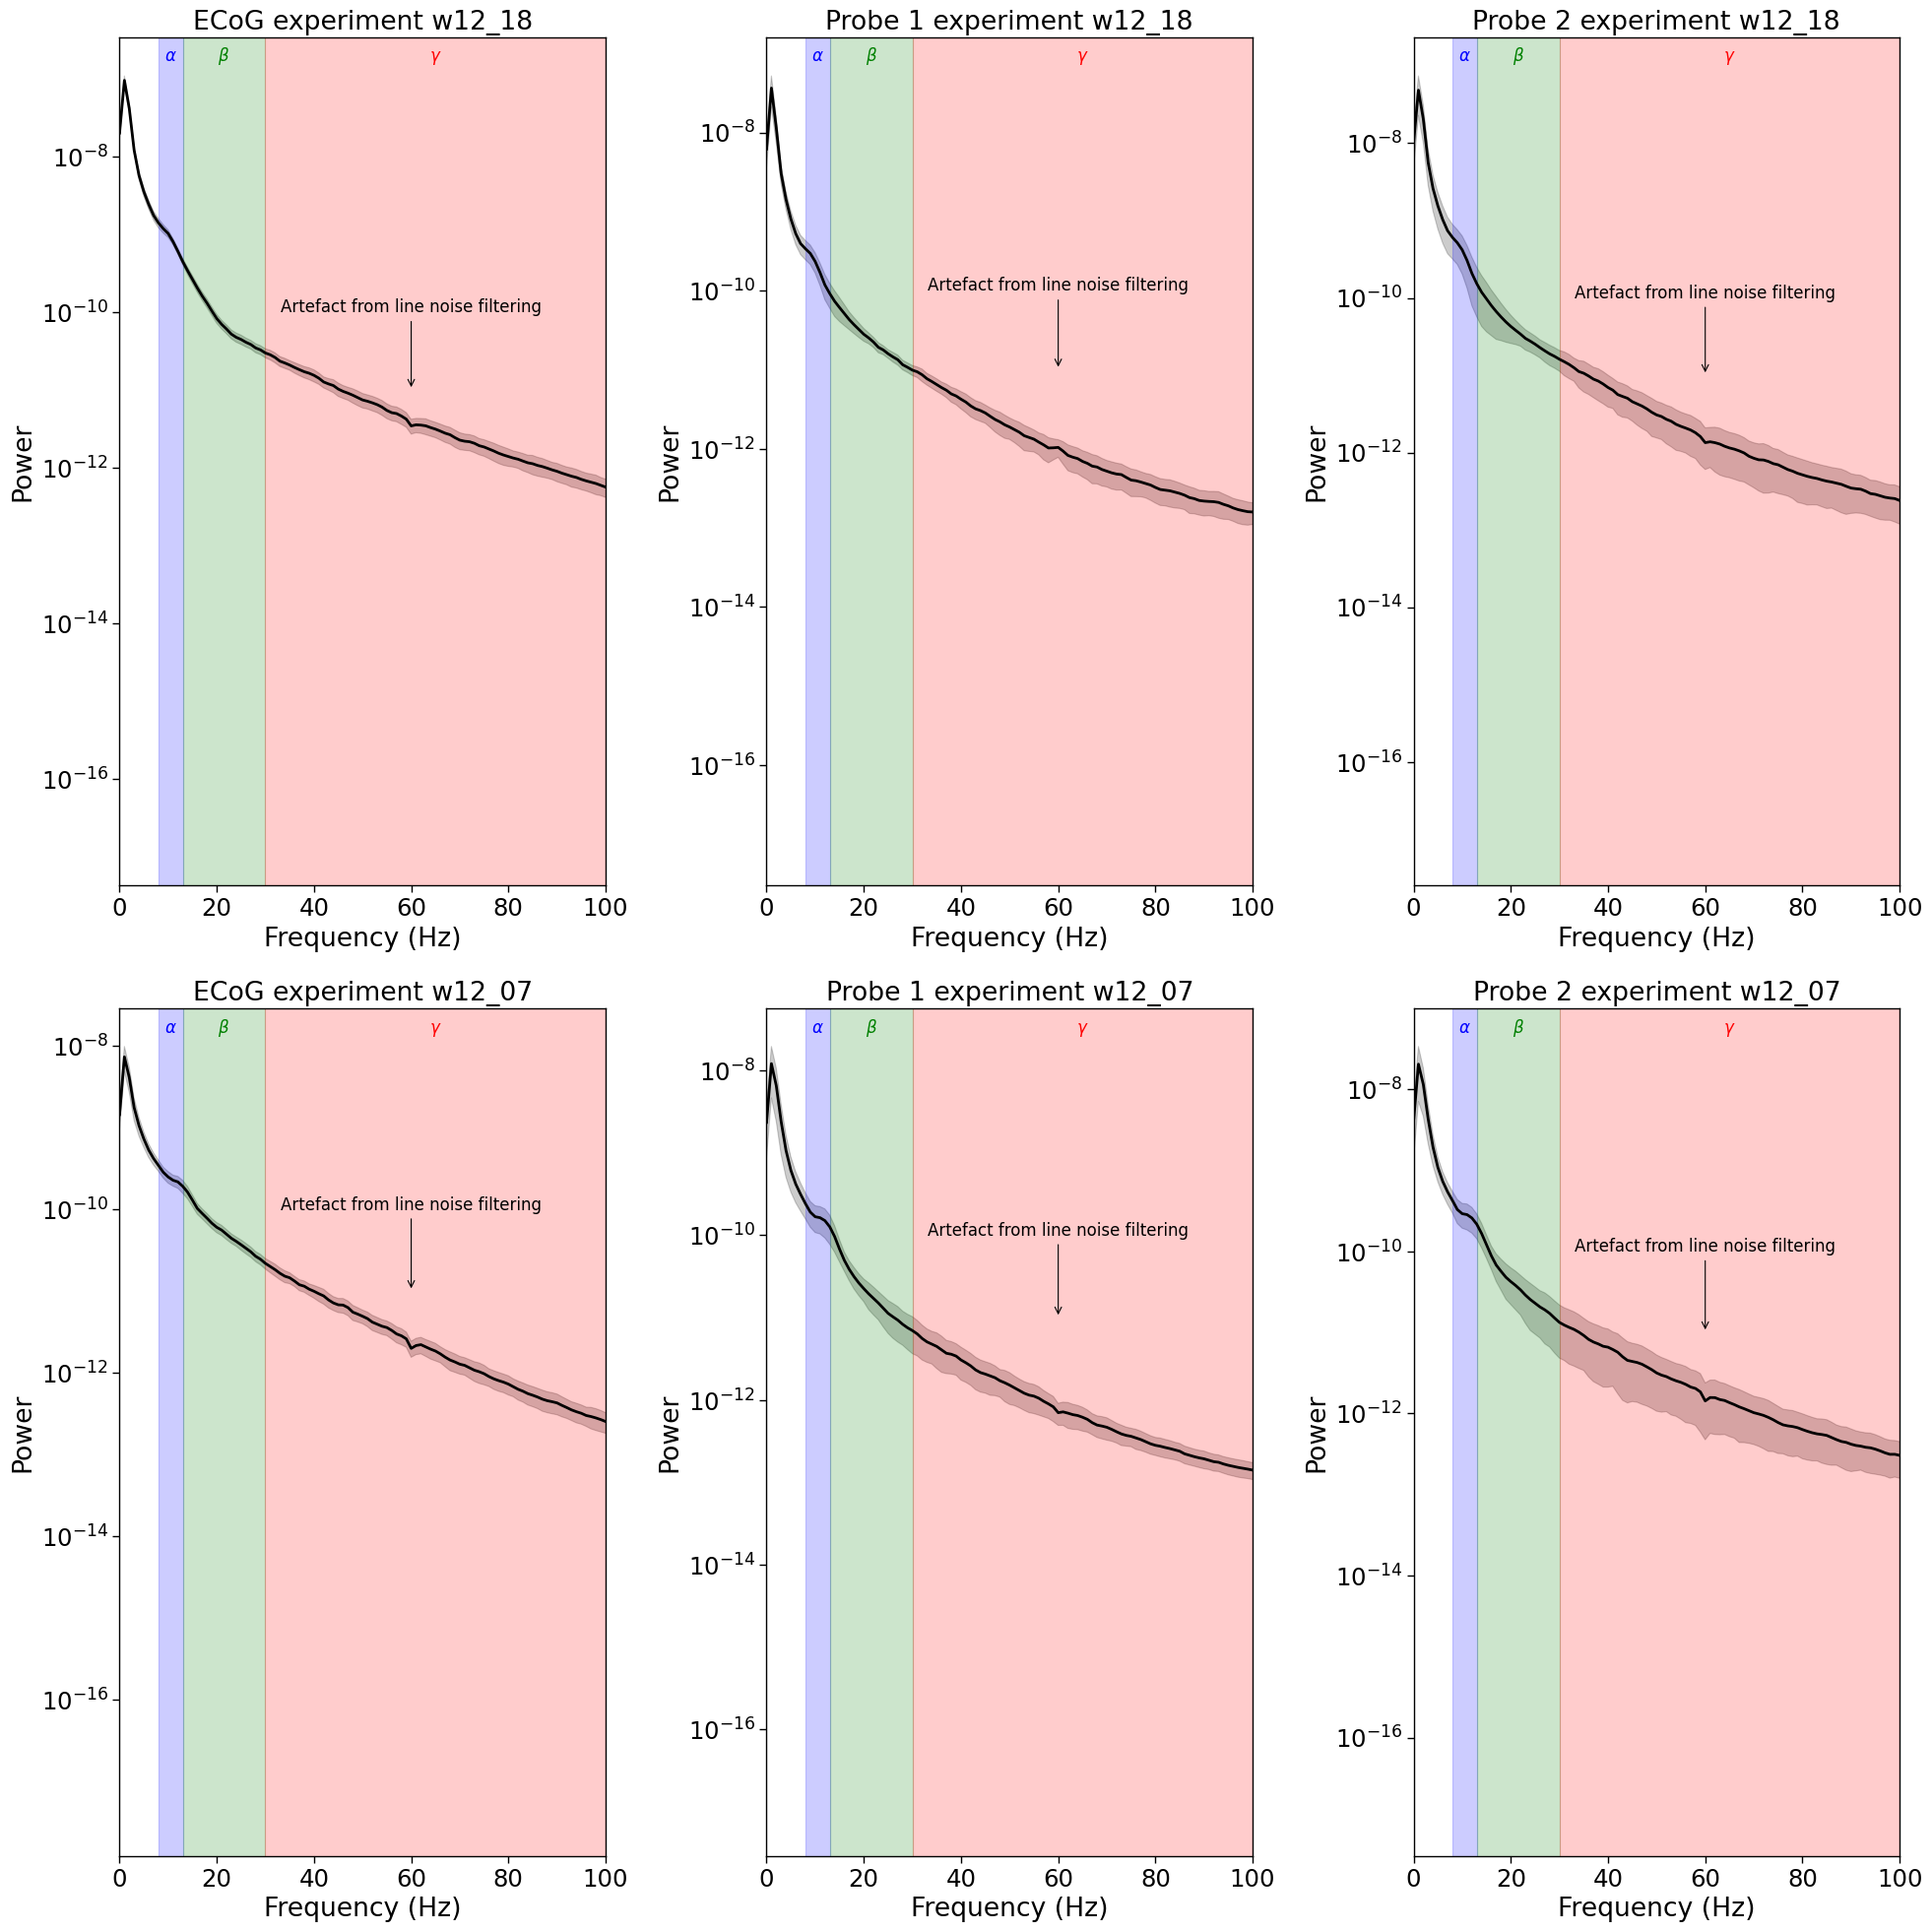

In [6]:
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Set plotting style
sns.set_context('paper', font_scale=2, rc={'lines.linewidth': 2})

# Set GridSpec for the figure
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(2, 3, figure=fig)

# Define the experiment titles and corresponding data
experiments = [
    ('ECoG experiment w12_18', freqs_ecog_18[0], powers_ecog_18),
    ('Probe 1 experiment w12_18', freqs_probe1_18[0], powers_probe1_18),
    ('Probe 2 experiment w12_18', freqs_probe2_18[0], powers_probe2_18),
    ('ECoG experiment w12_07', freqs_ecog_07[0], powers_ecog_07),
    ('Probe 1 experiment w12_07', freqs_probe1_07[0], powers_probe1_07),
    ('Probe 2 experiment w12_07', freqs_probe2_07[0], powers_probe2_07)
]

# Define the frequency bands with LaTeX-rendered Greek symbols and colors
bands = {'$\\alpha$': (8, 13, 'blue'), '$\\beta$': (13, 30, 'green'), '$\\gamma$': (30, 100, 'red')}

# Plot the collective spectra
for i, (title, freqs, powers) in enumerate(experiments):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    ax.plot(freqs, np.mean(powers, axis=0), color='black')
    ax.fill_between(freqs, np.mean(powers, axis=0) - np.std(powers, axis=0),
                    np.mean(powers, axis=0) + np.std(powers, axis=0), color='black', alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power')
    ax.set_yscale('log')
    ax.set_xlim(0, 100)
    
    # Add description of frequency bands
    for band, (start, end, color) in bands.items():
        ax.axvspan(start, end, color=color, alpha=0.2)
        ax.text((start + end) / 2, ax.get_ylim()[1] * 0.5, band, color=color, fontsize=12, ha='center')
        
    # Add arrow and annotation for 60 Hz frequency
    ax.annotate('Artefact from line noise filtering', xy=(60, 10e-12), xytext=(60, 10e-11),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')
    
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig(f"{output_dir}/general_spectral_analysis.png", dpi=300)
